<a href="https://colab.research.google.com/github/Rendy3001/BDS/blob/main/UML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
pip install --upgrade altair pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.1/658.1 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.7/167.7 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: Operation cancelled by user


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import altair as alt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sns.set()

In [ ]:
#Load the data
data_url = 'https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/FINDEX/WLD_2021_FINDEX_v03_M_csv.zip'
data = pd.read_csv(data_url, encoding='latin-1')

In [ ]:
data.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
0,Afghanistan,AFG,South Asia,22647496.0,144274031,0.716416,2,43.0,2,4,...,4,4,4.0,1,5.0,1,2,1,0.0,2021
1,Afghanistan,AFG,South Asia,22647496.0,180724554,0.497408,2,55.0,1,3,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
2,Afghanistan,AFG,South Asia,22647496.0,130686682,0.650431,1,15.0,1,2,...,4,4,4.0,4,3.0,2,2,0,0.0,2021
3,Afghanistan,AFG,South Asia,22647496.0,142646649,0.991862,2,23.0,1,4,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
4,Afghanistan,AFG,South Asia,22647496.0,199055310,0.554940,1,46.0,1,1,...,4,4,4.0,4,5.0,2,2,0,0.0,2021


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143887 entries, 0 to 143886
Columns: 128 entries, economy to year
dtypes: float64(90), int64(35), object(3)
memory usage: 140.5+ MB


#Kmeans clustering



###Data scaling

In [ ]:
data.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
0,Afghanistan,AFG,South Asia,22647496.0,144274031,0.716416,2,43.0,2,4,...,4,4,4.0,1,5.0,1,2,1,0.0,2021
1,Afghanistan,AFG,South Asia,22647496.0,180724554,0.497408,2,55.0,1,3,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
2,Afghanistan,AFG,South Asia,22647496.0,130686682,0.650431,1,15.0,1,2,...,4,4,4.0,4,3.0,2,2,0,0.0,2021
3,Afghanistan,AFG,South Asia,22647496.0,142646649,0.991862,2,23.0,1,4,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
4,Afghanistan,AFG,South Asia,22647496.0,199055310,0.554940,1,46.0,1,1,...,4,4,4.0,4,5.0,2,2,0,0.0,2021


In [ ]:
from sklearn.preprocessing import StandardScaler


data_filtered = data.iloc[:,3:]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

# Show the first few rows of the scaled data
pd.DataFrame(data_scaled, columns=data_filtered.columns)


,pop_adult,wpid_random,wgt,female,age,educ,inc_q,emp_in,urbanicity_f2f,account,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
0,-0.228466,-0.586113,-0.351221,1.066738,0.112042,0.043922,0.539345,-0.717685,-1.174804,0.641203,...,0.457674,0.349763,0.373416,-1.182200,0.746705,-0.363240,1.466692,0.735645,-0.693940,-0.35412
1,-0.228466,0.676852,-0.622465,1.066738,0.803975,-1.337446,-0.164981,-0.717685,-1.174804,-1.559569,...,0.457674,0.349763,-2.256257,1.076767,0.746705,-0.363240,1.466692,-1.359352,-0.693940,-0.35412
2,-0.228466,-1.056898,-0.432944,-0.937437,-1.502469,-1.337446,-0.869306,1.393369,-1.174804,-1.559569,...,0.457674,0.349763,0.373416,1.076767,-0.408310,2.635011,1.466692,-1.359352,-0.693940,-0.35412
3,-0.228466,-0.642500,-0.010079,1.066738,-1.041180,-1.337446,0.539345,-0.717685,0.851206,-1.559569,...,0.457674,0.349763,-2.256257,1.076767,0.746705,-0.363240,1.466692,-1.359352,-0.693940,-0.35412
4,-0.228466,1.311990,-0.551211,-0.937437,0.285025,-1.337446,-1.573632,1.393369,-1.174804,-1.559569,...,0.457674,0.349763,0.373416,1.076767,0.746705,2.635011,1.466692,-1.359352,-0.693940,-0.35412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143882,-0.290662,-0.659409,0.405889,1.066738,-1.098841,0.043922,1.243670,-0.717685,0.851206,0.641203,...,0.457674,0.349763,0.373416,1.076767,0.746705,-0.363240,-0.639958,-1.359352,-0.693940,-0.35412
143883,-0.290662,0.174751,-0.902613,-0.937437,0.630992,0.043922,1.243670,-0.717685,-1.174804,0.641203,...,-2.333907,0.349763,0.373416,1.076767,0.746705,-0.363240,1.466692,0.735645,1.441048,-0.35412
143884,-0.290662,-1.177532,-0.820362,-0.937437,0.342686,-1.337446,-1.573632,-0.717685,0.851206,-1.559569,...,0.457674,0.349763,0.373416,1.076767,0.746705,-0.363240,1.466692,-1.359352,-0.693940,-0.35412
143885,-0.290662,1.379925,1.428620,1.066738,-1.329485,-1.337446,-0.164981,-0.717685,-1.174804,0.641203,...,0.457674,0.349763,0.373416,1.076767,0.169198,2.635011,1.466692,0.735645,1.441048,-0.35412


In [ ]:
data_clean = pd.DataFrame(data_scaled).dropna(axis=1)

In [ ]:
data_clean.shape

(143887, 37)

###Data reduction

In [ ]:
import umap

In [ ]:
umap_scaler = umap.UMAP()

In [ ]:
#Creating a sample dataset with 5000 rows
data_sampled = data_clean.sample(5000)

In [ ]:
embeddings = umap_scaler.fit_transform(data_sampled)

In [ ]:
embeddings.shape

(5000, 2)

<Axes: >

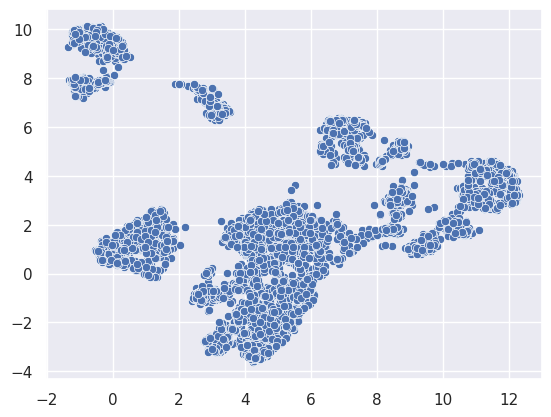

In [ ]:
sns.scatterplot(x=embeddings[:,0], y=embeddings[:,1])

In [ ]:
#Creating a sample dataset with 5000 rows
data_sampled_2 = data.sample(5000)

In [ ]:
# Resetting the index and keeping the old index as a column
data_sampled_2.reset_index(inplace=True)


In [ ]:
# Constructing a new DataFrame from the embeddings and merging with 'economy' and 'regionwb' columns from the original data
vis_data = pd.DataFrame({
    'x': embeddings[:, 0],
    'y': embeddings[:, 1],
    'economy': data_sampled_2['economy'],
    'regionwb': data_sampled_2['regionwb']
})

#Dropping null values
vis_data = vis_data.dropna()

# Create an interactive scatter plot using Altair
chart = alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['economy', 'regionwb']
).interactive()

chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

#K-means clustering

In [ ]:
# Implementation of K-means

def k_means_simple(data, k, max_iters=100):
    # 1. Initialize the k cluster centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # 2. Assign each data point to the closest centroid
        distances = np.linalg.norm(data - centroids[:, np.newaxis], axis=2)
        labels = np.argmin(distances, axis=0)

        # 3. Recompute the centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids


###Performing elbow method to determine ideal number of clusters

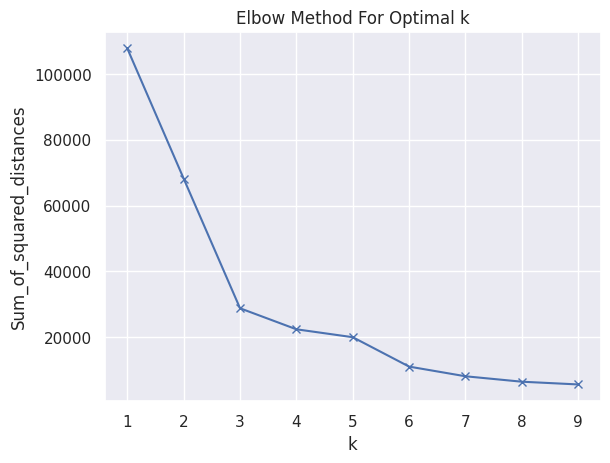

In [ ]:
umap_scaler_km = umap.UMAP(n_components=6)
embeddings_km = umap_scaler.fit_transform(data_sampled)


Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, n_init = "auto")
    km = km.fit(embeddings_km)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
clusterer = KMeans(n_clusters=3)

In [ ]:
clusterer.fit(data_sampled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [ ]:
data_sampled_2.dropna(axis=1)

,index,economy,economycode,pop_adult,wpid_random,wgt,female,educ,inc_q,account,...,saved,borrowed,receive_wages,receive_transfers,receive_pension,pay_utilities,mobileowner,internetaccess,anydigpayment,year
0,137327,Uzbekistan,UZB,2.437320e+07,189282255,0.654455,1,2,4,1,...,0,0,4,4,4,2,1,1,1,2021
1,25266,China,CHN,1.153773e+09,119042048,0.251840,1,2,2,1,...,1,0,4,4,4,4,1,1,1,2021
2,142102,Zambia,ZMB,1.029182e+07,189796386,2.992569,1,1,1,1,...,0,1,4,4,4,4,2,2,1,2021
3,10246,Benin,BEN,7.038174e+06,206907016,0.447352,2,1,3,0,...,0,0,4,4,4,4,2,2,0,2021
4,38125,"Egypt, Arab Rep.",EGY,6.762152e+07,160285443,0.995128,2,2,5,0,...,0,0,4,4,4,4,1,1,0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,53681,"Hong Kong SAR, China",HKG,6.533674e+06,156376222,0.565010,1,3,3,1,...,1,1,1,1,4,3,1,1,1,2021
4996,74192,Latvia,LVA,1.589084e+06,177277355,0.455242,1,3,4,1,...,0,0,1,1,4,4,1,1,1,2021
4997,37036,Ecuador,ECU,1.281029e+07,196485373,0.624247,2,2,5,1,...,1,1,2,4,4,4,1,1,1,2021
4998,51544,Guatemala,GTM,1.123736e+07,134577826,0.681960,1,1,5,0,...,1,1,4,3,4,4,1,2,0,2022


In [ ]:
data_sampled_2['cluster'] = clusterer.labels_

In [ ]:
# Ensure data_sampled_2 has the same number of rows as embeddings
data_sampled_2 = data_sampled_2.iloc[:embeddings.shape[0], :]

# Create the vis_data DataFrame
vis_data = pd.DataFrame(embeddings)
vis_data['economy'] = data_sampled_2['economy'].values  # Align by index/row
vis_data['regionwb'] = data_sampled_2['regionwb'].values  # Align by index/row
vis_data['cluster'] = data_sampled_2['cluster'].values  # Align by index/row

# Rename the columns
vis_data.columns = ['x', 'y', 'economy', 'regionwb', 'cluster']

# Check for any NaN values
print(vis_data.isna().sum())


x            0
y            0
economy      0
regionwb    33
cluster      0
dtype: int64


In [ ]:
vis_data.dropna()

,x,y,economy,regionwb,cluster
0,3.568029,1.840053,Uzbekistan,Europe & Central Asia (excluding high income),2
1,5.412947,-2.223264,China,East Asia & Pacific (excluding high income),2
2,11.789698,3.653404,Zambia,Sub-Saharan Africa (excluding high income),1
3,1.152644,2.091330,Benin,Sub-Saharan Africa (excluding high income),1
4,2.714794,-1.062649,"Egypt, Arab Rep.",Middle East & North Africa (excluding high inc...,2
...,...,...,...,...,...
4995,9.366435,0.971902,"Hong Kong SAR, China",High income,1
4996,7.164494,1.668246,Latvia,High income,1
4997,2.570585,-0.826818,Ecuador,Latin America & Caribbean (excluding high income),2
4998,7.206818,1.447017,Guatemala,Latin America & Caribbean (excluding high income),1


In [ ]:
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['economy', 'regionwb'],
    color=alt.Color('cluster:N', scale=alt.Scale(scheme='dark2'))
).interactive()

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)